In [59]:
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

In [60]:
from PIL import Image
path = '../images/256/'
# im = Image.open(path + 'waldo/1_1_1.jpg')
# im.to_thumb(128,128)

In [61]:
from fastai.vision.all import *
filenames = get_image_files(path)
filenames

(#373) [Path('../images/256/notwaldo/15_1_0.jpg'),Path('../images/256/notwaldo/16_0_0.jpg'),Path('../images/256/notwaldo/20_0_2.jpg'),Path('../images/256/notwaldo/15_3_2.jpg'),Path('../images/256/notwaldo/16_2_2.jpg'),Path('../images/256/notwaldo/20_2_0.jpg'),Path('../images/256/notwaldo/5_2_2.jpg'),Path('../images/256/notwaldo/6_3_2.jpg'),Path('../images/256/notwaldo/5_0_0.jpg'),Path('../images/256/notwaldo/6_1_0.jpg')...]

In [62]:
failed = verify_images(filenames)
failed

(#0) []

In [63]:
img = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.4, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(256)])

In [64]:
dls = img.dataloaders(path)

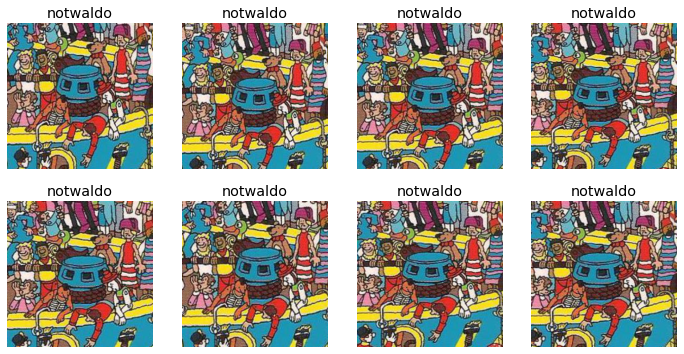

In [65]:
img = img.new(item_tfms=[RandomResizedCrop(256, min_scale=0.8)])
dls = img.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [66]:

metrics = [accuracy, error_rate]
our_out_of_the_box_model = cnn_learner(dls, vgg11_bn, loss_func=CrossEntropyLossFlat(), metrics=metrics)
our_out_of_the_box_model.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.335601,1.134437,0.322148,0.677852,01:44


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.795667,0.843796,0.442953,0.557047,03:23
1,0.788833,0.797750,0.536913,0.463087,04:23
2,0.676879,0.556087,0.724832,0.275168,02:50
3,0.581841,0.379898,0.859060,0.140940,01:58
4,0.500795,0.347722,0.885906,0.114094,02:04
5,0.443647,0.348416,0.899329,0.100671,03:10


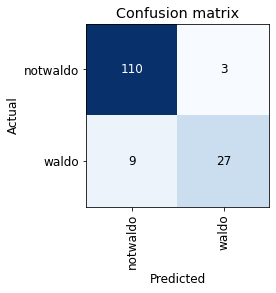

In [ ]:
interp = ClassificationInterpretation.from_learner(our_out_of_the_box_model)
interp.plot_confusion_matrix()

In [ ]:
our_out_of_the_box_model.save('model')
our_out_of_the_box_model.export()